### Panda DataFrames

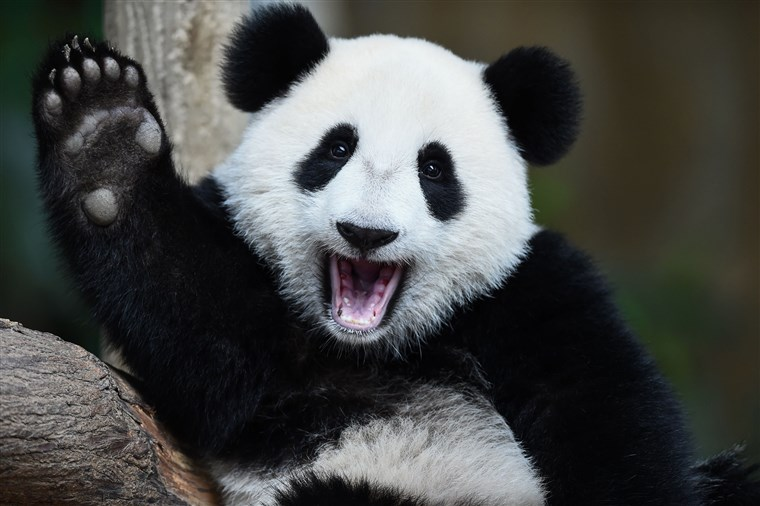

Data is often represented in a table format.  This is true for fields in records on a file, rows and columns in a spreadsheet, and in relational tables.  Pandas provides a data structure specifically to deal with this common data organization.

*DataFrames* are two-dimensional tables of columns of values with an index.  Columns may be of different types.  
Values need not be homogeneous.  Cells have both a row and column identifier, similar to the row and columns in spreadsheets.

From a machine learning perspective, consider describing observation vectors, features, and labels.  Observation vectors directly map to rows (index) in a DataFrame.  Features and labels correspond to specific columns.

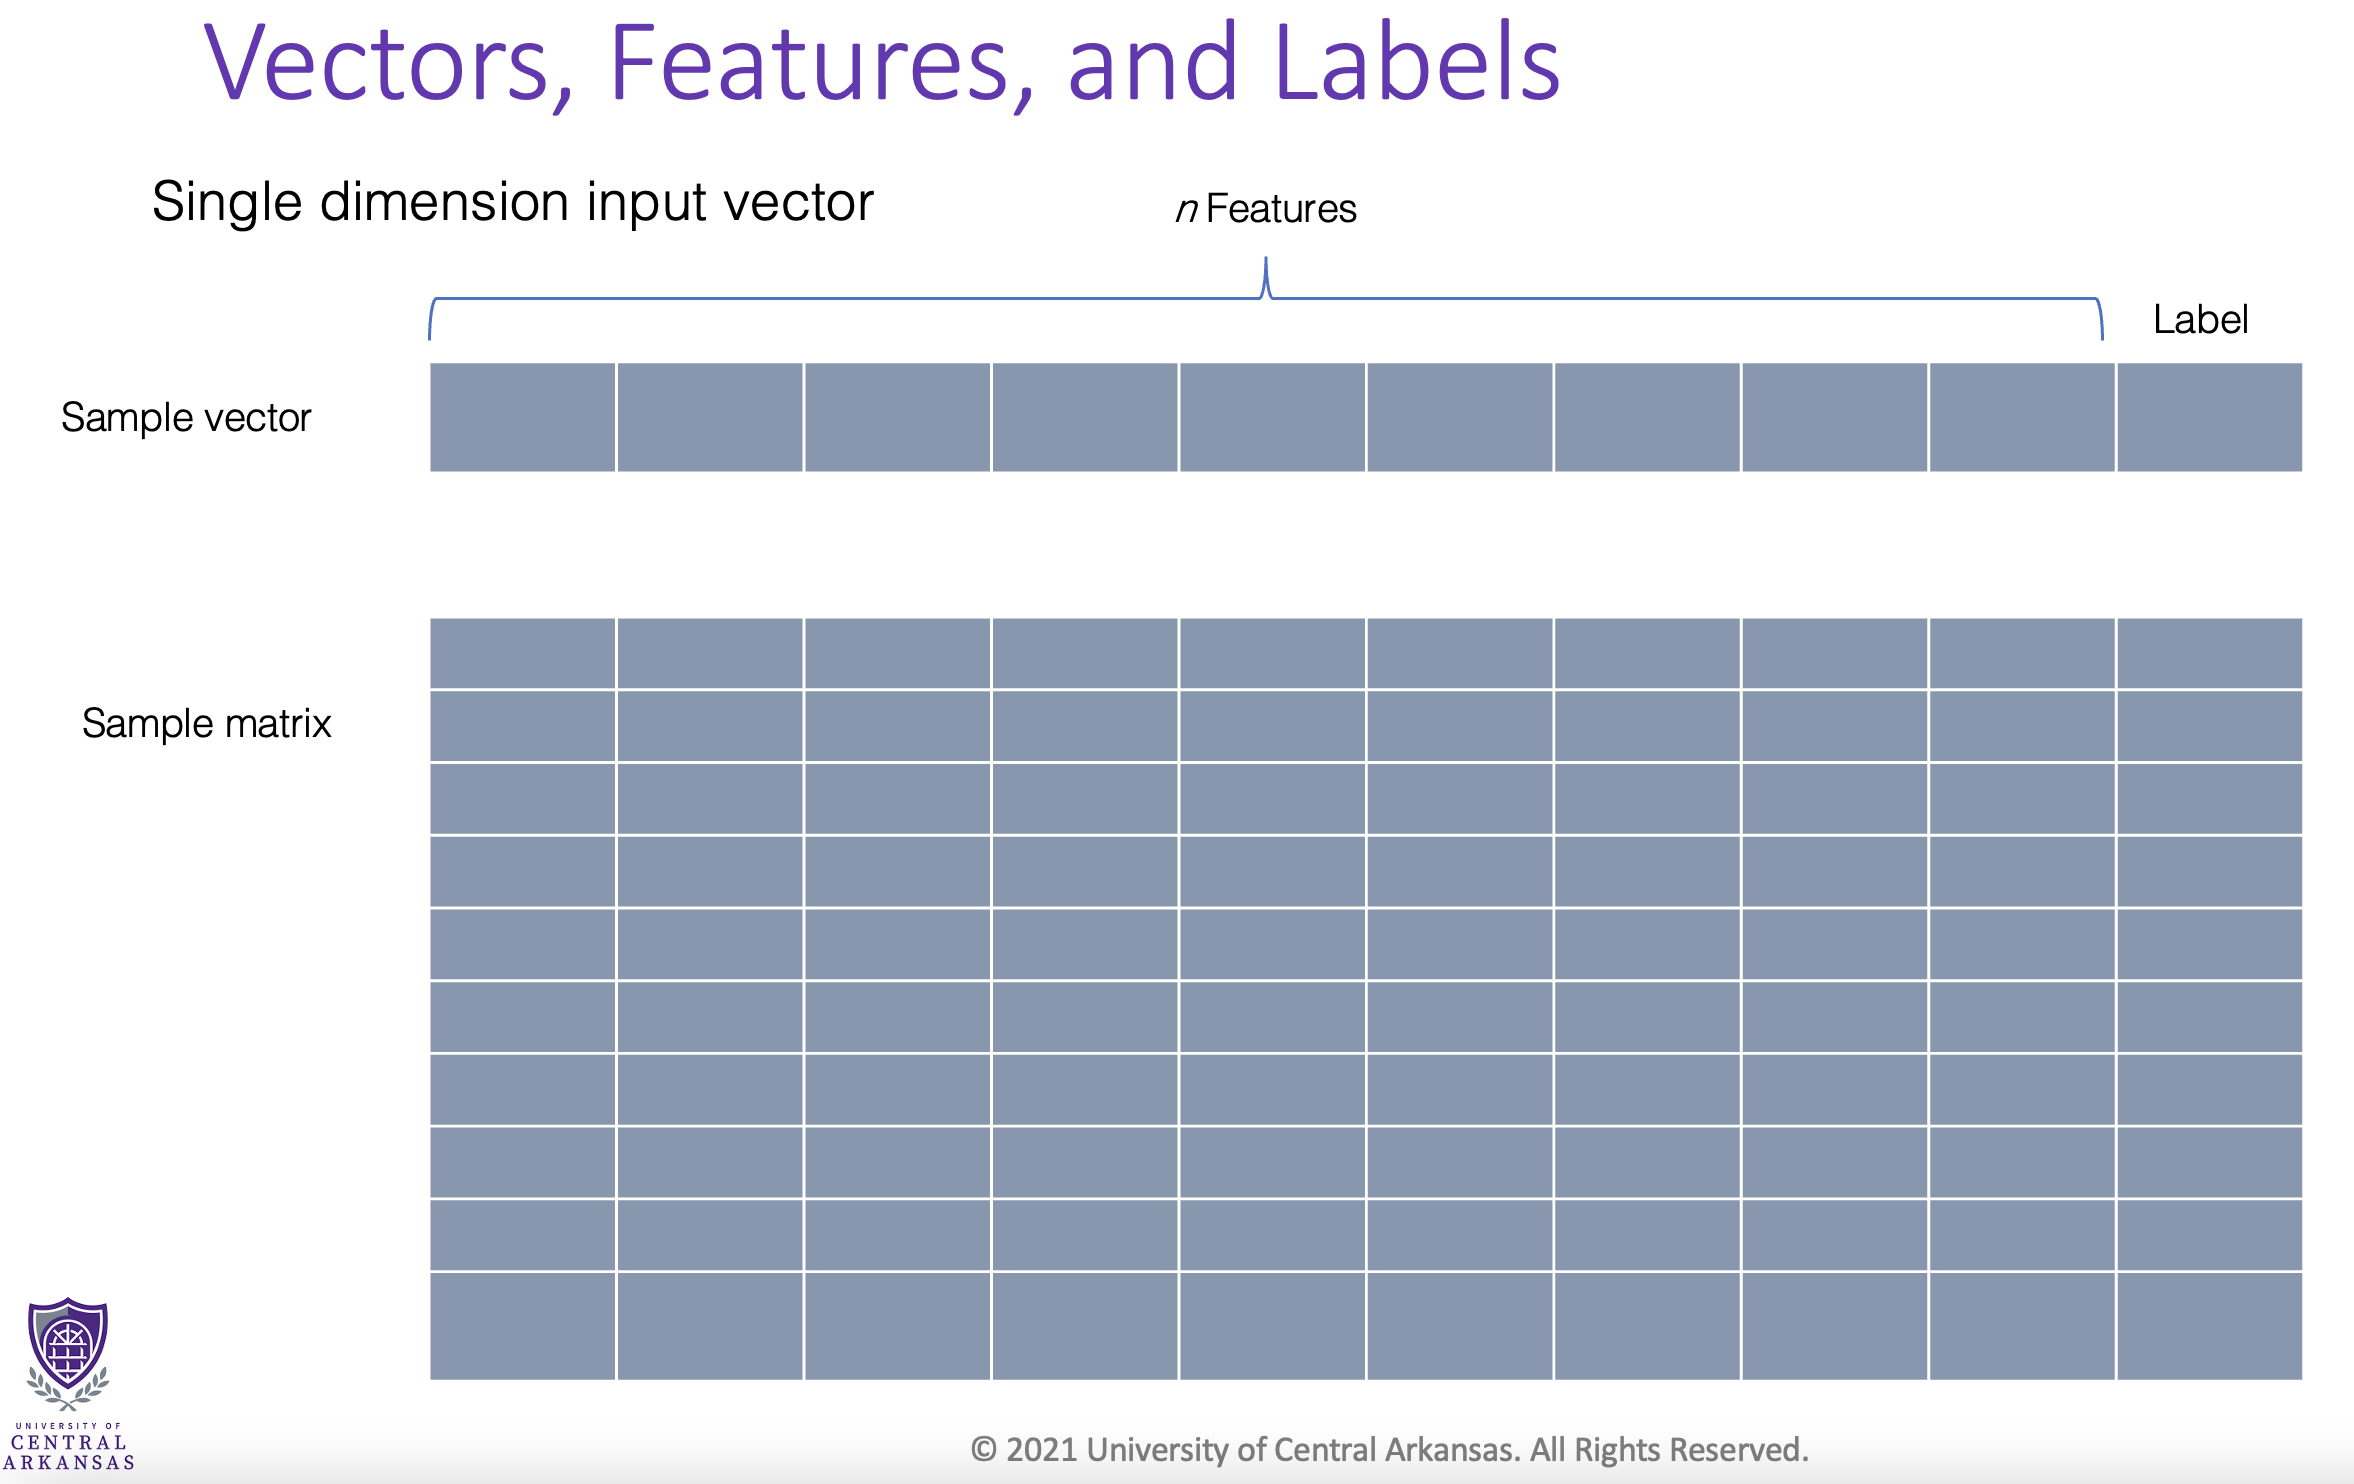

The Pandas DataFrame data structure and most of the associated methods have been widely adopted.  In particular, Spark has provided DataFrame capabilities that closely mirror Pandas.

Pandas is limited to working with data that will fit into RAM.  This works for many problems, but clearly not for very large data sets.  Spark is specifically designed to handle these very large data sets across a cluster of machines.

In this class, we focus on exploring Pandas DataFrames, knowing that most of this learning directly translates to Spark when you face larger data problems.

In [104]:
import os
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import sklearn.linear_model
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

In [105]:
students = ['Harry', 'Hermione', 'Ron', 'Luna', 'Draco', 'Crabbe', 'Cho', 'Cedric', 'Fred', 'George', 'Neville', 'Goyle']

In [106]:
students[2]

'Ron'

In [7]:
transfiguration = [92, 100, 83, 97, 88, 15, 92, 98, 93, 93, 84, 43]

In [8]:
transfiguration[5]

15

In [9]:
potions = {'Harry': 80, 'Hermione': 100, 'Ron': 70, 'Draco': 100, 'Crabbe': 31, 'Fred': 75, 'George': 75, 'Goyle': 23, 'Luna': 94}

In [10]:
potions['Draco']

100

While we could use lists and dictionaries for our work, using columns and tables of data is so common in data science that additional modules (libraries) have been created on top of more primitive Python capabilities to ease the work.


In particular, the Pandas module (short for "Panel Data") provides two fundamental data objects, Series and Dataframes, that provide powerful abstractions for manipulating data.

## Series ##

A Pandas Series is a one-dimensional array of data with an index.  One can think of the index as the keys in a dictionary and the values of the series as the values associated with each dictionary key.

We can create a Series from a list or a dictionary.

When we create a Series from a list, the Series index is set to the position of the values (i.e., a range).

In [11]:
student_series = Series(students)
student_series

0        Harry
1     Hermione
2          Ron
3         Luna
4        Draco
5       Crabbe
6          Cho
7       Cedric
8         Fred
9       George
10     Neville
11       Goyle
dtype: object

We can reference an item in the Series by the index value.

In [12]:
student_series[6]

'Cho'

Slicing works on the default series index just like lists (note that the last index value is NOT returned as part of the slice).

In [13]:
student_series[4:9]

4     Draco
5    Crabbe
6       Cho
7    Cedric
8      Fred
dtype: object

We can also create a series from a dictionary.  In this case, the index values of the Series become the keys from the dictionary.

In [14]:
class_instructor = {'Potions': 'Snape', 
                    'Divination': 'Trelawney', 
                    'Defense': 'Lockhart', 
                    'Data Science': 'Talley', 
                    'Transfiguration': 'McGonagall',
                    'Charms': 'Flitwick',
                    'Herbology': 'Sprout'}

In [15]:
class_instructor['Charms']

'Flitwick'

In [16]:
class_instructor_series = Series(class_instructor)
class_instructor_series

Potions                 Snape
Divination          Trelawney
Defense              Lockhart
Data Science           Talley
Transfiguration    McGonagall
Charms               Flitwick
Herbology              Sprout
dtype: object

In [17]:
class_instructor_series['Divination']

'Trelawney'

Slicing of a Series index with defined values works a bit differently.  In this case, the last index value in the slice IS returned with the slice.

In [18]:
class_instructor_series['Defense': 'Transfiguration']

Defense              Lockhart
Data Science           Talley
Transfiguration    McGonagall
dtype: object

Let's look at some class grades for the students.

We already have the potion grades by student.

In [19]:
potions

{'Harry': 80,
 'Hermione': 100,
 'Ron': 70,
 'Draco': 100,
 'Crabbe': 31,
 'Fred': 75,
 'George': 75,
 'Goyle': 23,
 'Luna': 94}

However, our transfiguration grades are not so conveniently labeled.

In [20]:
transfiguration

[92, 100, 83, 97, 88, 15, 92, 98, 93, 93, 84, 43]

Fortunately, the order of the grades exactly corresponds to the order of our students and all students are the class, so let's build a dictionary.

In [21]:
transfiguration = {k: float(v) for (k,v) in zip(students, transfiguration)}
transfiguration

{'Harry': 92.0,
 'Hermione': 100.0,
 'Ron': 83.0,
 'Luna': 97.0,
 'Draco': 88.0,
 'Crabbe': 15.0,
 'Cho': 92.0,
 'Cedric': 98.0,
 'Fred': 93.0,
 'George': 93.0,
 'Neville': 84.0,
 'Goyle': 43.0}

## DataFrames ##

We could make a Series for each of the class grades, but what we really want is a table that shows the grades for all the students.

We want a Pandas Dataframe!

A DataFrame is a table with an index that identifies rows and a set of named columns.  The remaning cells contain data and may be of varying data types.

Pandas give Python the ability to work with data using mechanisms similar to a spreadsheet.  You can use Pandas to load, manipulate, align, merge, and query data.  

We can also think of a Pandas Dataframe as a dictionary where the dictionary keys are the names of table columns and the column values are Series (i.e., each column is a single series).  The index for the Dataframe covers all the index values from all the Series (i.e., columns) in the Dataframe (i.e., table).

Let's make a dataframe.  In this case, let's make it by specifying two dictionaries as the contents.  Each dictionary is (behind the scenes) converted to a Series and the Series added as a column to the Dataframe.  

In [22]:
data = {'Potions': potions, 'Transfiguration': transfiguration}
data

{'Potions': {'Harry': 80,
  'Hermione': 100,
  'Ron': 70,
  'Draco': 100,
  'Crabbe': 31,
  'Fred': 75,
  'George': 75,
  'Goyle': 23,
  'Luna': 94},
 'Transfiguration': {'Harry': 92.0,
  'Hermione': 100.0,
  'Ron': 83.0,
  'Luna': 97.0,
  'Draco': 88.0,
  'Crabbe': 15.0,
  'Cho': 92.0,
  'Cedric': 98.0,
  'Fred': 93.0,
  'George': 93.0,
  'Neville': 84.0,
  'Goyle': 43.0}}

In [23]:
grades = DataFrame(data)
grades

Potions  Transfiguration
Harry        80.0             92.0
Hermione    100.0            100.0
Ron          70.0             83.0
Draco       100.0             88.0
Crabbe       31.0             15.0
Fred         75.0             93.0
George       75.0             93.0
Goyle        23.0             43.0
Luna         94.0             97.0
Cho           NaN             92.0
Cedric        NaN             98.0
Neville       NaN             84.0

Note that some of the students are not in both classes.  Pandas is smart enough to put the table together and set the values of missing data to "NaN" (not a number).  That is pretty convenient!

DataFrames have formatting attributes that you can set, so we can make the NaN values a bit more obvious.

In [24]:
grades.style.highlight_null(null_color='red')

Here are some grades for other classes.

In [25]:
runes = {'Hermione': 100, 'Luna': 100}
defense = {'Harry': 100, 'Hermione': 100, 'Ron': 92, 'Draco': 72, 'Crabbe': 29, 'Fred': 91, 'George': 91, 'Neville': 71, 'Cho': 95, 'Goyle': 32, 'Luna': 93}
divination = {'Harry': 71, 'Ron': 73, 'Draco': 75, 'Crabbe': 6, 'Cho': 93, 'Goyle': 11, 'Luna': 98, 'Neville': 78}
datascience = {'Harry': 92, 'Hermione': 100, 'Ron': 98, 'Draco': 72, 'Crabbe': 3, 'Fred': 58, 'George': 58, 'Cho': 98, 'Goyle': 21, 'Luna': 100}
charms = {'Harry': 93, 'Hermione': 100, 'Ron': 95, 'Draco': 92, 'Crabbe': 70, 'Cho': 95, 'Goyle': 41, 'Luna': 98}
herbology = {'Harry': 83, 'Hermione': 100, 'Ron': 87, 'Draco': 92, 'Crabbe': 52, 'Neville': 100, 'Cho': 97, 'Goyle': 49, 'Luna': 98}

Let's extend our dataframe for some new class data.

One convenient way to add a full column is to use direct assignment to a new column name.

In [26]:
grades['Runes'] = Series(runes)
grades

Potions  Transfiguration  Runes
Harry        80.0             92.0    NaN
Hermione    100.0            100.0  100.0
Ron          70.0             83.0    NaN
Draco       100.0             88.0    NaN
Crabbe       31.0             15.0    NaN
Fred         75.0             93.0    NaN
George       75.0             93.0    NaN
Goyle        23.0             43.0    NaN
Luna         94.0             97.0  100.0
Cho           NaN             92.0    NaN
Cedric        NaN             98.0    NaN
Neville       NaN             84.0    NaN

Another approach is to combine two DataFrames.

In [27]:
data = {'Defense': defense, 'Divination': divination, 'Data Science': datascience, 'Charms': charms, 'Herbology': herbology}
grades2 = DataFrame(data)
grades2

Defense  Divination  Data Science  Charms  Herbology
Harry         100        71.0          92.0    93.0       83.0
Hermione      100         NaN         100.0   100.0      100.0
Ron            92        73.0          98.0    95.0       87.0
Draco          72        75.0          72.0    92.0       92.0
Crabbe         29         6.0           3.0    70.0       52.0
Fred           91         NaN          58.0     NaN        NaN
George         91         NaN          58.0     NaN        NaN
Neville        71        78.0           NaN     NaN      100.0
Cho            95        93.0          98.0    95.0       97.0
Goyle          32        11.0          21.0    41.0       49.0
Luna           93        98.0         100.0    98.0       98.0

In [28]:
grades = grades.join(grades2)
grades

Potions  Transfiguration  Runes  Defense  Divination  Data Science  \
Harry        80.0             92.0    NaN    100.0        71.0          92.0   
Hermione    100.0            100.0  100.0    100.0         NaN         100.0   
Ron          70.0             83.0    NaN     92.0        73.0          98.0   
Draco       100.0             88.0    NaN     72.0        75.0          72.0   
Crabbe       31.0             15.0    NaN     29.0         6.0           3.0   
Fred         75.0             93.0    NaN     91.0         NaN          58.0   
George       75.0             93.0    NaN     91.0         NaN          58.0   
Goyle        23.0             43.0    NaN     32.0        11.0          21.0   
Luna         94.0             97.0  100.0     93.0        98.0         100.0   
Cho           NaN             92.0    NaN     95.0        93.0          98.0   
Cedric        NaN             98.0    NaN      NaN         NaN           NaN   
Neville       NaN             84.0    NaN     71.0        78.0           NaN   

          Charms  Herbology  
Harry       93.0       83.0  
Hermione   100.0      100.0  
Ron         95.0       87.0  
Draco       92.0       92.0  
Crabbe      70.0       52.0  
Fred         NaN        NaN  
George       NaN        NaN  
Goyle       41.0       49.0  
Luna        98.0       98.0  
Cho         95.0       97.0  
Cedric       NaN        NaN  
Neville      NaN      100.0

## Selecting from a DataFrame ##

Let's look at the Divination grades.  That is a ***column*** in our dataframe, so we can index directly into the dataframe to return the full column.

In [29]:
grades['Divination']

Harry       71.0
Hermione     NaN
Ron         73.0
Draco       75.0
Crabbe       6.0
Fred         NaN
George       NaN
Goyle       11.0
Luna        98.0
Cho         93.0
Cedric       NaN
Neville     78.0
Name: Divination, dtype: float64

For illustration, let's highlight the column we just selected within the dataframe.

In [30]:
grades.style.set_properties(**{'background-color': 'lightgreen'}, subset=['Divination'])

Select a subset of the columns using a list of column names

In [31]:
grades[['Transfiguration', 'Divination']]

Transfiguration  Divination
Harry                92.0        71.0
Hermione            100.0         NaN
Ron                  83.0        73.0
Draco                88.0        75.0
Crabbe               15.0         6.0
Fred                 93.0         NaN
George               93.0         NaN
Goyle                43.0        11.0
Luna                 97.0        98.0
Cho                  92.0        93.0
Cedric               98.0         NaN
Neville              84.0        78.0

In [32]:
grades.style.set_properties(**{'background-color': 'lightgreen'}, subset=['Transfiguration', 'Divination'])

Let's look at Hermione's grades.  Now we need to look at the ***row***.  Use the `loc` method to specify the row index.

In [33]:
grades.loc['Hermione']

Potions            100.0
Transfiguration    100.0
Runes              100.0
Defense            100.0
Divination           NaN
Data Science       100.0
Charms             100.0
Herbology          100.0
Name: Hermione, dtype: float64

For illustration, let's highlight the row we selected.

In [34]:
grades.style.set_properties(subset = pd.IndexSlice[['Hermione'], :], **{'background-color' : 'lightgreen'})

Show Hermione's grade in Data Science.  In this case, we are referencing a specific cell in the dataframe, which means providing a row index value and a column name.  This is much as one would reference a cell in a spreadsheet, but using the `loc` method with Pandas dataframes.  The first argument identifies the row and the second, the column.

In [35]:
grades.loc['Hermione', 'Data Science']

100.0

In [36]:
grades.style.set_properties(subset = pd.IndexSlice[['Hermione'], 'Data Science'], **{'background-color' : 'lightgreen'})

What is Harry's grade in Data Science?

In [37]:
grades.loc['Harry', 'Data Science']

92.0

Fetch a subset of columns using a list as the second argument to `loc`.

In [38]:
grades.loc['Hermione', ['Potions', 'Divination', 'Transfiguration']]

Potions            100.0
Divination           NaN
Transfiguration    100.0
Name: Hermione, dtype: float64

In [39]:
grades.style.set_properties(subset = pd.IndexSlice[['Hermione'], ['Potions', 'Divination', 'Transfiguration']], **{'background-color' : 'lightgreen'})

The second argument to `loc` can also be a slice.

In [40]:
grades.loc['Hermione', 'Potions': 'Divination']

Potions            100.0
Transfiguration    100.0
Runes              100.0
Defense            100.0
Divination           NaN
Name: Hermione, dtype: float64

## Selecting Multiple Rows ##

Up to now, we have fetched data from the dataframe based upon column name or index value.  These fetches have returned specific columns or specific rows.

Often we want to retrieve data based upon the values within the dataframe cells rather than just the column name or index value.  To do that, we need to specify a boolean expression that describes the rows to retrieve.

First, recall our grades data...

In [41]:
grades

Potions  Transfiguration  Runes  Defense  Divination  Data Science  \
Harry        80.0             92.0    NaN    100.0        71.0          92.0   
Hermione    100.0            100.0  100.0    100.0         NaN         100.0   
Ron          70.0             83.0    NaN     92.0        73.0          98.0   
Draco       100.0             88.0    NaN     72.0        75.0          72.0   
Crabbe       31.0             15.0    NaN     29.0         6.0           3.0   
Fred         75.0             93.0    NaN     91.0         NaN          58.0   
George       75.0             93.0    NaN     91.0         NaN          58.0   
Goyle        23.0             43.0    NaN     32.0        11.0          21.0   
Luna         94.0             97.0  100.0     93.0        98.0         100.0   
Cho           NaN             92.0    NaN     95.0        93.0          98.0   
Cedric        NaN             98.0    NaN      NaN         NaN           NaN   
Neville       NaN             84.0    NaN     71.0        78.0           NaN   

          Charms  Herbology  
Harry       93.0       83.0  
Hermione   100.0      100.0  
Ron         95.0       87.0  
Draco       92.0       92.0  
Crabbe      70.0       52.0  
Fred         NaN        NaN  
George       NaN        NaN  
Goyle       41.0       49.0  
Luna        98.0       98.0  
Cho         95.0       97.0  
Cedric       NaN        NaN  
Neville      NaN      100.0

Using `loc`, we can reference multiple rows by index value.

In [42]:
grades.loc[['Luna', 'Cho', 'Hermione']]

Potions  Transfiguration  Runes  Defense  Divination  Data Science  \
Luna         94.0             97.0  100.0     93.0        98.0         100.0   
Cho           NaN             92.0    NaN     95.0        93.0          98.0   
Hermione    100.0            100.0  100.0    100.0         NaN         100.0   

          Charms  Herbology  
Luna        98.0       98.0  
Cho         95.0       97.0  
Hermione   100.0      100.0

In [43]:
grades.style.set_properties(subset = pd.IndexSlice[['Luna', 'Cho', 'Hermione'], :], **{'background-color' : 'lightgreen'})

Or by slices...

In [44]:
grades.loc['Ron': 'Goyle']

Potions  Transfiguration  Runes  Defense  Divination  Data Science  \
Ron        70.0             83.0    NaN     92.0        73.0          98.0   
Draco     100.0             88.0    NaN     72.0        75.0          72.0   
Crabbe     31.0             15.0    NaN     29.0         6.0           3.0   
Fred       75.0             93.0    NaN     91.0         NaN          58.0   
George     75.0             93.0    NaN     91.0         NaN          58.0   
Goyle      23.0             43.0    NaN     32.0        11.0          21.0   

        Charms  Herbology  
Ron       95.0       87.0  
Draco     92.0       92.0  
Crabbe    70.0       52.0  
Fred       NaN        NaN  
George     NaN        NaN  
Goyle     41.0       49.0

While it may seem a bit odd at first, `loc` will accept a boolean expression the first argument.  This will return all the rows of the dataframe that satisfy the expression.  Note that we are using the values of the cells to express the condition.

Who is failing Transfiguration?

Note that we must explicitly reference the dataframe column for the condition.

In [45]:
grades.loc[(grades['Transfiguration'] < 60)]

Potions  Transfiguration  Runes  Defense  Divination  Data Science  \
Crabbe     31.0             15.0    NaN     29.0         6.0           3.0   
Goyle      23.0             43.0    NaN     32.0        11.0          21.0   

        Charms  Herbology  
Crabbe    70.0       52.0  
Goyle     41.0       49.0

In [46]:
grades.style.set_properties(subset = pd.IndexSlice[grades['Transfiguration'] < 60, :], **{'background-color' : 'lightgreen'})

As with earlier uses of `loc`, the second parameter can limit the returned columns.

In [47]:
grades.loc[(grades['Transfiguration'] < 60), ['Transfiguration', 'Divination', 'Charms']]

Transfiguration  Divination  Charms
Crabbe             15.0         6.0    70.0
Goyle              43.0        11.0    41.0

In [48]:
grades.style.set_properties(subset = pd.IndexSlice[grades['Transfiguration'] < 60, ['Transfiguration', 'Divination', 'Charms']], **{'background-color' : 'lightgreen'})

Who is failing ***both*** Transfiguration and Charms?

In [49]:
grades.loc[(grades['Transfiguration'] < 60) & (grades['Charms'] < 70)]

Potions  Transfiguration  Runes  Defense  Divination  Data Science  \
Goyle     23.0             43.0    NaN     32.0        11.0          21.0   

       Charms  Herbology  
Goyle    41.0       49.0

***Warning:*** Note that the boolean expressions for Pandas are not quite the same as for Python (e.g., "&" instead of "and").  As a result, Pandas expression evaluation can be counter-intuitive due to the operator precedence.  Use parentheses in the expression to guarantee evaluation order.

Who is doing well in Defense, but only average in Potions?

In [50]:
grades.loc[(grades['Defense'] > 90) & (grades['Potions'] < 80) & (grades['Potions'] > 70)]

Potions  Transfiguration  Runes  Defense  Divination  Data Science  \
Fred       75.0             93.0    NaN     91.0         NaN          58.0   
George     75.0             93.0    NaN     91.0         NaN          58.0   

        Charms  Herbology  
Fred       NaN        NaN  
George     NaN        NaN

Who is doing well in either Data Sciences or Potions?

In [51]:
grades.loc[(grades['Potions'] > 90) | (grades['Data Science'] > 90), ['Potions', 'Data Science']]

Potions  Data Science
Harry        80.0          92.0
Hermione    100.0         100.0
Ron          70.0          98.0
Draco       100.0          72.0
Luna         94.0         100.0
Cho           NaN          98.0

## Queries using Special Predicates ##

Who doesn't have a grade in Potions?  This is a little trickier.  The condition is formed using the `isnull` method.

In [52]:
grades.loc[grades['Potions'].isnull()]

Potions  Transfiguration  Runes  Defense  Divination  Data Science  \
Cho          NaN             92.0    NaN     95.0        93.0          98.0   
Cedric       NaN             98.0    NaN      NaN         NaN           NaN   
Neville      NaN             84.0    NaN     71.0        78.0           NaN   

         Charms  Herbology  
Cho        95.0       97.0  
Cedric      NaN        NaN  
Neville     NaN      100.0

Which classes have grades for all students?  

Here, we are picking the columns that satisfy the condition, so the condition is in the column paramter for `loc`.  Each row for the column must satisfy the condition.

In [53]:
grades.loc[:, grades.notnull().all()]

Transfiguration
Harry                92.0
Hermione            100.0
Ron                  83.0
Draco                88.0
Crabbe               15.0
Fred                 93.0
George               93.0
Goyle                43.0
Luna                 97.0
Cho                  92.0
Cedric               98.0
Neville              84.0

What students have a grade in every class?  

Now, the condition is on the row.  All columns in the row must have a grade.

In [54]:
grades.loc[grades.notnull().all(axis='columns')]

Potions  Transfiguration  Runes  Defense  Divination  Data Science  \
Luna     94.0             97.0  100.0     93.0        98.0         100.0   

      Charms  Herbology  
Luna    98.0       98.0

Does any student have a 100 in every class they are taking?  Let me guess...

Note below that "grades" in the condition implicitly references each column in turn

In [55]:
grades.loc[grades.isin([np.NaN, 100]).all(axis='columns')]

Potions  Transfiguration  Runes  Defense  Divination  Data Science  \
Hermione    100.0            100.0  100.0    100.0         NaN         100.0   

          Charms  Herbology  
Hermione   100.0      100.0

In [56]:
grades.loc[((grades.isna()) | (grades == 100)).all(axis='columns')]

Potions  Transfiguration  Runes  Defense  Divination  Data Science  \
Hermione    100.0            100.0  100.0    100.0         NaN         100.0   

          Charms  Herbology  
Hermione   100.0      100.0

Who has above a 90 in every class they are taking?

Note that this condition could not be satisfied using the `isin` method.

In [57]:
grades.loc[((grades.isna()) | (grades > 90)).all(axis='columns')]

Potions  Transfiguration  Runes  Defense  Divination  Data Science  \
Hermione    100.0            100.0  100.0    100.0         NaN         100.0   
Luna         94.0             97.0  100.0     93.0        98.0         100.0   
Cho           NaN             92.0    NaN     95.0        93.0          98.0   
Cedric        NaN             98.0    NaN      NaN         NaN           NaN   

          Charms  Herbology  
Hermione   100.0      100.0  
Luna        98.0       98.0  
Cho         95.0       97.0  
Cedric       NaN        NaN

In [58]:
grades.loc[: , ((grades.isna() )|(grades > 30)).all()]

Runes  Charms  Herbology
Harry       NaN    93.0       83.0
Hermione  100.0   100.0      100.0
Ron         NaN    95.0       87.0
Draco       NaN    92.0       92.0
Crabbe      NaN    70.0       52.0
Fred        NaN     NaN        NaN
George      NaN     NaN        NaN
Goyle       NaN    41.0       49.0
Luna      100.0    98.0       98.0
Cho         NaN    95.0       97.0
Cedric      NaN     NaN        NaN
Neville     NaN     NaN      100.0

In [59]:
grades

Potions  Transfiguration  Runes  Defense  Divination  Data Science  \
Harry        80.0             92.0    NaN    100.0        71.0          92.0   
Hermione    100.0            100.0  100.0    100.0         NaN         100.0   
Ron          70.0             83.0    NaN     92.0        73.0          98.0   
Draco       100.0             88.0    NaN     72.0        75.0          72.0   
Crabbe       31.0             15.0    NaN     29.0         6.0           3.0   
Fred         75.0             93.0    NaN     91.0         NaN          58.0   
George       75.0             93.0    NaN     91.0         NaN          58.0   
Goyle        23.0             43.0    NaN     32.0        11.0          21.0   
Luna         94.0             97.0  100.0     93.0        98.0         100.0   
Cho           NaN             92.0    NaN     95.0        93.0          98.0   
Cedric        NaN             98.0    NaN      NaN         NaN           NaN   
Neville       NaN             84.0    NaN     71.0        78.0           NaN   

          Charms  Herbology  
Harry       93.0       83.0  
Hermione   100.0      100.0  
Ron         95.0       87.0  
Draco       92.0       92.0  
Crabbe      70.0       52.0  
Fred         NaN        NaN  
George       NaN        NaN  
Goyle       41.0       49.0  
Luna        98.0       98.0  
Cho         95.0       97.0  
Cedric       NaN        NaN  
Neville      NaN      100.0

In [60]:
grades.loc[((grades.isna()) | (grades > 90)).all(axis='columns')].sort_index()

Potions  Transfiguration  Runes  Defense  Divination  Data Science  \
Cedric        NaN             98.0    NaN      NaN         NaN           NaN   
Cho           NaN             92.0    NaN     95.0        93.0          98.0   
Hermione    100.0            100.0  100.0    100.0         NaN         100.0   
Luna         94.0             97.0  100.0     93.0        98.0         100.0   

          Charms  Herbology  
Cedric       NaN        NaN  
Cho         95.0       97.0  
Hermione   100.0      100.0  
Luna        98.0       98.0

In [61]:
grades.loc[((grades.isna()) | (grades > 90)).all(axis='columns')].sort_values(by='Transfiguration', ascending=False)

Potions  Transfiguration  Runes  Defense  Divination  Data Science  \
Hermione    100.0            100.0  100.0    100.0         NaN         100.0   
Cedric        NaN             98.0    NaN      NaN         NaN           NaN   
Luna         94.0             97.0  100.0     93.0        98.0         100.0   
Cho           NaN             92.0    NaN     95.0        93.0          98.0   

          Charms  Herbology  
Hermione   100.0      100.0  
Cedric       NaN        NaN  
Luna        98.0       98.0  
Cho         95.0       97.0

In [62]:
grades.loc[(grades > 90).all(axis='columns')]

Potions  Transfiguration  Runes  Defense  Divination  Data Science  \
Luna     94.0             97.0  100.0     93.0        98.0         100.0   

      Charms  Herbology  
Luna    98.0       98.0

## Computing Basic Statistics from the DataFrame ##

Show the basic statistics for a specific column

In [63]:
grades['Data Science'].describe()

count     10.000000
mean      70.000000
std       35.014283
min        3.000000
25%       58.000000
50%       82.000000
75%       98.000000
max      100.000000
Name: Data Science, dtype: float64

Show basic statistics for all columns in the dataframe

In [64]:
grades.describe()

Potions  Transfiguration  Runes     Defense  Divination  \
count    9.000000        12.000000    2.0   11.000000    8.000000   
mean    72.000000        81.500000  100.0   78.727273   63.125000   
std     27.883687        25.752317    0.0   25.714163   35.073138   
min     23.000000        15.000000  100.0   29.000000    6.000000   
25%     70.000000        83.750000  100.0   71.500000   56.000000   
50%     75.000000        92.000000  100.0   91.000000   74.000000   
75%     94.000000        94.000000  100.0   94.000000   81.750000   
max    100.000000       100.000000  100.0  100.000000   98.000000   

       Data Science      Charms   Herbology  
count     10.000000    8.000000    9.000000  
mean      70.000000   85.500000   84.222222  
std       35.014283   20.234341   19.998611  
min        3.000000   41.000000   49.000000  
25%       58.000000   86.500000   83.000000  
50%       82.000000   94.000000   92.000000  
75%       98.000000   95.750000   98.000000  
max      100.000000  100.000000  100.000000

Transpose the dataframe and use `describe` to summarize each student.

In [65]:
grades.T

Harry  Hermione   Ron  Draco  Crabbe  Fred  George  Goyle  \
Potions           80.0     100.0  70.0  100.0    31.0  75.0    75.0   23.0   
Transfiguration   92.0     100.0  83.0   88.0    15.0  93.0    93.0   43.0   
Runes              NaN     100.0   NaN    NaN     NaN   NaN     NaN    NaN   
Defense          100.0     100.0  92.0   72.0    29.0  91.0    91.0   32.0   
Divination        71.0       NaN  73.0   75.0     6.0   NaN     NaN   11.0   
Data Science      92.0     100.0  98.0   72.0     3.0  58.0    58.0   21.0   
Charms            93.0     100.0  95.0   92.0    70.0   NaN     NaN   41.0   
Herbology         83.0     100.0  87.0   92.0    52.0   NaN     NaN   49.0   

                  Luna   Cho  Cedric  Neville  
Potions           94.0   NaN     NaN      NaN  
Transfiguration   97.0  92.0    98.0     84.0  
Runes            100.0   NaN     NaN      NaN  
Defense           93.0  95.0     NaN     71.0  
Divination        98.0  93.0     NaN     78.0  
Data Science     100.0  98.0     NaN      NaN  
Charms            98.0  95.0     NaN      NaN  
Herbology         98.0  97.0     NaN    100.0

In [66]:
grades.T.describe()

Harry  Hermione        Ron       Draco     Crabbe       Fred  \
count    7.000000       7.0   7.000000    7.000000   7.000000   4.000000   
mean    87.285714     100.0  85.428571   84.428571  29.428571  79.250000   
std      9.793098       0.0  10.752630   11.311604  24.541510  16.296728   
min     71.000000     100.0  70.000000   72.000000   3.000000  58.000000   
25%     81.500000     100.0  78.000000   73.500000  10.500000  70.750000   
50%     92.000000     100.0  87.000000   88.000000  29.000000  83.000000   
75%     92.500000     100.0  93.500000   92.000000  41.500000  91.500000   
max    100.000000     100.0  98.000000  100.000000  70.000000  93.000000   

          George      Goyle       Luna        Cho  Cedric     Neville  
count   4.000000   7.000000    8.00000   6.000000     1.0    4.000000  
mean   79.250000  31.428571   97.25000  95.000000    98.0   83.250000  
std    16.296728  13.733865    2.54951   2.280351     NaN   12.365948  
min    58.000000  11.000000   93.00000  92.000000    98.0   71.000000  
25%    70.750000  22.000000   96.25000  93.500000    98.0   76.250000  
50%    83.000000  32.000000   98.00000  95.000000    98.0   81.000000  
75%    91.500000  42.000000   98.50000  96.500000    98.0   88.000000  
max    93.000000  49.000000  100.00000  98.000000    98.0  100.000000

In [67]:
grades['Potions'].value_counts()

100.0    2
75.0     2
80.0     1
70.0     1
31.0     1
23.0     1
94.0     1
Name: Potions, dtype: int64

In [68]:
grades['Potions'].sort_values()

Goyle        23.0
Crabbe       31.0
Ron          70.0
Fred         75.0
George       75.0
Harry        80.0
Luna         94.0
Hermione    100.0
Draco       100.0
Cho           NaN
Cedric        NaN
Neville       NaN
Name: Potions, dtype: float64

In [69]:
grades['Potions'].sort_values(ascending=False)

Hermione    100.0
Draco       100.0
Luna         94.0
Harry        80.0
Fred         75.0
George       75.0
Ron          70.0
Crabbe       31.0
Goyle        23.0
Cho           NaN
Cedric        NaN
Neville       NaN
Name: Potions, dtype: float64

How is Hermione doing in school?

In [70]:
grades.loc['Hermione'].describe()

count      7.0
mean     100.0
std        0.0
min      100.0
25%      100.0
50%      100.0
75%      100.0
max      100.0
Name: Hermione, dtype: float64

In [71]:
grades.loc['Hermione'].value_counts()

100.0    7
Name: Hermione, dtype: int64

Well, that was no surprise.

Show statistics about Harry's classes.  In this case, we are computing statistics across a row.

In [72]:
grades.loc['Harry']

Potions             80.0
Transfiguration     92.0
Runes                NaN
Defense            100.0
Divination          71.0
Data Science        92.0
Charms              93.0
Herbology           83.0
Name: Harry, dtype: float64

In [73]:
grades.loc['Harry'].sort_values(ascending=False)

Defense            100.0
Charms              93.0
Transfiguration     92.0
Data Science        92.0
Herbology           83.0
Potions             80.0
Divination          71.0
Runes                NaN
Name: Harry, dtype: float64

In [74]:
grades.loc['Harry'].describe()

count      7.000000
mean      87.285714
std        9.793098
min       71.000000
25%       81.500000
50%       92.000000
75%       92.500000
max      100.000000
Name: Harry, dtype: float64

In [75]:
grades.loc['Harry'].value_counts()

92.0     2
80.0     1
100.0    1
71.0     1
93.0     1
83.0     1
Name: Harry, dtype: int64

In [76]:
grades.loc['Harry'].sum()

611.0

In [77]:
grades.loc['Harry'].mode()

0    92.0
dtype: float64

In [78]:
grades.loc['Harry'].median()

92.0

What about his work in some of the core classes?

In [79]:
grades.loc['Harry', ['Potions', 'Transfiguration', 'Defense']]

Potions             80.0
Transfiguration     92.0
Defense            100.0
Name: Harry, dtype: float64

In [80]:
grades.loc['Harry', ['Potions', 'Transfiguration', 'Defense']].describe()

count      3.000000
mean      90.666667
std       10.066446
min       80.000000
25%       86.000000
50%       92.000000
75%       96.000000
max      100.000000
Name: Harry, dtype: float64

What are the worst grades in each class?

In [81]:
grades.min()

Potions             23.0
Transfiguration     15.0
Runes              100.0
Defense             29.0
Divination           6.0
Data Science         3.0
Charms              41.0
Herbology           49.0
dtype: float64

Who has the highest grade in each class?

In [82]:
grades[(grades == grades.max()).any(axis='columns')]

Potions  Transfiguration  Runes  Defense  Divination  Data Science  \
Harry        80.0             92.0    NaN    100.0        71.0          92.0   
Hermione    100.0            100.0  100.0    100.0         NaN         100.0   
Draco       100.0             88.0    NaN     72.0        75.0          72.0   
Luna         94.0             97.0  100.0     93.0        98.0         100.0   
Neville       NaN             84.0    NaN     71.0        78.0           NaN   

          Charms  Herbology  
Harry       93.0       83.0  
Hermione   100.0      100.0  
Draco       92.0       92.0  
Luna        98.0       98.0  
Neville      NaN      100.0

We can be a little fancy and set some style on the dataframe result.

In [83]:
grades[(grades == grades.max()).any(axis='columns')].style.highlight_max(axis='rows')

Who has the lowest grade in each class?

In [84]:
grades[(grades == grades.min()).any(axis='columns')]

Potions  Transfiguration  Runes  Defense  Divination  Data Science  \
Hermione    100.0            100.0  100.0    100.0         NaN         100.0   
Crabbe       31.0             15.0    NaN     29.0         6.0           3.0   
Goyle        23.0             43.0    NaN     32.0        11.0          21.0   
Luna         94.0             97.0  100.0     93.0        98.0         100.0   

          Charms  Herbology  
Hermione   100.0      100.0  
Crabbe      70.0       52.0  
Goyle       41.0       49.0  
Luna        98.0       98.0

A little more fancy formatting...

In [85]:
grades[(grades == grades.min()).any(axis='columns')].style.highlight_min(axis='rows')

## Save our work ##

We are about to start adding stuff to our original dataframe.  Let's save our exising datafile into a CSV so we can restore that dataframe later.

In [86]:
# Set the path to our data location
datapath = os.path.join(".", "")
datapath

'./'

In [87]:
hogwarts_datafile = 'hogwarts_grades.csv'

In [88]:
grades.to_csv(datapath + hogwarts_datafile, index_label='Name')

Let's read the data back in to a different dataframe and make sure everything is saved correctly.

In [89]:
saved_grades = pd.read_csv(datapath + hogwarts_datafile)

In [90]:
saved_grades

Name  Potions  Transfiguration  Runes  Defense  Divination  \
0      Harry     80.0             92.0    NaN    100.0        71.0   
1   Hermione    100.0            100.0  100.0    100.0         NaN   
2        Ron     70.0             83.0    NaN     92.0        73.0   
3      Draco    100.0             88.0    NaN     72.0        75.0   
4     Crabbe     31.0             15.0    NaN     29.0         6.0   
5       Fred     75.0             93.0    NaN     91.0         NaN   
6     George     75.0             93.0    NaN     91.0         NaN   
7      Goyle     23.0             43.0    NaN     32.0        11.0   
8       Luna     94.0             97.0  100.0     93.0        98.0   
9        Cho      NaN             92.0    NaN     95.0        93.0   
10    Cedric      NaN             98.0    NaN      NaN         NaN   
11   Neville      NaN             84.0    NaN     71.0        78.0   

    Data Science  Charms  Herbology  
0           92.0    93.0       83.0  
1          100.0   100.0      100.0  
2           98.0    95.0       87.0  
3           72.0    92.0       92.0  
4            3.0    70.0       52.0  
5           58.0     NaN        NaN  
6           58.0     NaN        NaN  
7           21.0    41.0       49.0  
8          100.0    98.0       98.0  
9           98.0    95.0       97.0  
10           NaN     NaN        NaN  
11           NaN     NaN      100.0

In [91]:
if grades.equals(saved_grades):
    print('Everything is cool.')
else:
    print('Hmmm...something is amiss.')

Hmmm...something is amiss.


In [92]:
grades

Potions  Transfiguration  Runes  Defense  Divination  Data Science  \
Harry        80.0             92.0    NaN    100.0        71.0          92.0   
Hermione    100.0            100.0  100.0    100.0         NaN         100.0   
Ron          70.0             83.0    NaN     92.0        73.0          98.0   
Draco       100.0             88.0    NaN     72.0        75.0          72.0   
Crabbe       31.0             15.0    NaN     29.0         6.0           3.0   
Fred         75.0             93.0    NaN     91.0         NaN          58.0   
George       75.0             93.0    NaN     91.0         NaN          58.0   
Goyle        23.0             43.0    NaN     32.0        11.0          21.0   
Luna         94.0             97.0  100.0     93.0        98.0         100.0   
Cho           NaN             92.0    NaN     95.0        93.0          98.0   
Cedric        NaN             98.0    NaN      NaN         NaN           NaN   
Neville       NaN             84.0    NaN     71.0        78.0           NaN   

          Charms  Herbology  
Harry       93.0       83.0  
Hermione   100.0      100.0  
Ron         95.0       87.0  
Draco       92.0       92.0  
Crabbe      70.0       52.0  
Fred         NaN        NaN  
George       NaN        NaN  
Goyle       41.0       49.0  
Luna        98.0       98.0  
Cho         95.0       97.0  
Cedric       NaN        NaN  
Neville      NaN      100.0

Ahhh...our original dataframe index is showing up as a column in the dataframe we read from disk.  We need to tell read_csv how to handle the index.

In [93]:
saved_grades = pd.read_csv(datapath + hogwarts_datafile, index_col='Name')

In [94]:
saved_grades

Potions  Transfiguration  Runes  Defense  Divination  Data Science  \
Name                                                                           
Harry        80.0             92.0    NaN    100.0        71.0          92.0   
Hermione    100.0            100.0  100.0    100.0         NaN         100.0   
Ron          70.0             83.0    NaN     92.0        73.0          98.0   
Draco       100.0             88.0    NaN     72.0        75.0          72.0   
Crabbe       31.0             15.0    NaN     29.0         6.0           3.0   
Fred         75.0             93.0    NaN     91.0         NaN          58.0   
George       75.0             93.0    NaN     91.0         NaN          58.0   
Goyle        23.0             43.0    NaN     32.0        11.0          21.0   
Luna         94.0             97.0  100.0     93.0        98.0         100.0   
Cho           NaN             92.0    NaN     95.0        93.0          98.0   
Cedric        NaN             98.0    NaN      NaN         NaN           NaN   
Neville       NaN             84.0    NaN     71.0        78.0           NaN   

          Charms  Herbology  
Name                         
Harry       93.0       83.0  
Hermione   100.0      100.0  
Ron         95.0       87.0  
Draco       92.0       92.0  
Crabbe      70.0       52.0  
Fred         NaN        NaN  
George       NaN        NaN  
Goyle       41.0       49.0  
Luna        98.0       98.0  
Cho         95.0       97.0  
Cedric       NaN        NaN  
Neville      NaN      100.0

In [95]:
if grades.equals(saved_grades):
    print('Everything is cool.')
else:
    print('Hmmm...something is amiss.')

Everything is cool.


## Augmenting our data ##

Time for an assessment of all the students across all the classes.

How many total points does each student have across all the classes for which they are enrolled?

In [96]:
total_points = grades.sum(axis='columns')
total_points

Harry       611.0
Hermione    700.0
Ron         598.0
Draco       591.0
Crabbe      206.0
Fred        317.0
George      317.0
Goyle       220.0
Luna        778.0
Cho         570.0
Cedric       98.0
Neville     333.0
dtype: float64

What is the average (mean) score of each student across all their classes?

In [97]:
average_class_points = grades.mean(axis='columns')
average_class_points

Harry        87.285714
Hermione    100.000000
Ron          85.428571
Draco        84.428571
Crabbe       29.428571
Fred         79.250000
George       79.250000
Goyle        31.428571
Luna         97.250000
Cho          95.000000
Cedric       98.000000
Neville      83.250000
dtype: float64

Add these two overall assessments to our dataframe.

In [98]:
grades['Total Points'] = total_points
grades

Potions  Transfiguration  Runes  Defense  Divination  Data Science  \
Harry        80.0             92.0    NaN    100.0        71.0          92.0   
Hermione    100.0            100.0  100.0    100.0         NaN         100.0   
Ron          70.0             83.0    NaN     92.0        73.0          98.0   
Draco       100.0             88.0    NaN     72.0        75.0          72.0   
Crabbe       31.0             15.0    NaN     29.0         6.0           3.0   
Fred         75.0             93.0    NaN     91.0         NaN          58.0   
George       75.0             93.0    NaN     91.0         NaN          58.0   
Goyle        23.0             43.0    NaN     32.0        11.0          21.0   
Luna         94.0             97.0  100.0     93.0        98.0         100.0   
Cho           NaN             92.0    NaN     95.0        93.0          98.0   
Cedric        NaN             98.0    NaN      NaN         NaN           NaN   
Neville       NaN             84.0    NaN     71.0        78.0           NaN   

          Charms  Herbology  Total Points  
Harry       93.0       83.0         611.0  
Hermione   100.0      100.0         700.0  
Ron         95.0       87.0         598.0  
Draco       92.0       92.0         591.0  
Crabbe      70.0       52.0         206.0  
Fred         NaN        NaN         317.0  
George       NaN        NaN         317.0  
Goyle       41.0       49.0         220.0  
Luna        98.0       98.0         778.0  
Cho         95.0       97.0         570.0  
Cedric       NaN        NaN          98.0  
Neville      NaN      100.0         333.0

In [99]:
grades['Average Class Points'] = average_class_points
grades

Potions  Transfiguration  Runes  Defense  Divination  Data Science  \
Harry        80.0             92.0    NaN    100.0        71.0          92.0   
Hermione    100.0            100.0  100.0    100.0         NaN         100.0   
Ron          70.0             83.0    NaN     92.0        73.0          98.0   
Draco       100.0             88.0    NaN     72.0        75.0          72.0   
Crabbe       31.0             15.0    NaN     29.0         6.0           3.0   
Fred         75.0             93.0    NaN     91.0         NaN          58.0   
George       75.0             93.0    NaN     91.0         NaN          58.0   
Goyle        23.0             43.0    NaN     32.0        11.0          21.0   
Luna         94.0             97.0  100.0     93.0        98.0         100.0   
Cho           NaN             92.0    NaN     95.0        93.0          98.0   
Cedric        NaN             98.0    NaN      NaN         NaN           NaN   
Neville       NaN             84.0    NaN     71.0        78.0           NaN   

          Charms  Herbology  Total Points  Average Class Points  
Harry       93.0       83.0         611.0             87.285714  
Hermione   100.0      100.0         700.0            100.000000  
Ron         95.0       87.0         598.0             85.428571  
Draco       92.0       92.0         591.0             84.428571  
Crabbe      70.0       52.0         206.0             29.428571  
Fred         NaN        NaN         317.0             79.250000  
George       NaN        NaN         317.0             79.250000  
Goyle       41.0       49.0         220.0             31.428571  
Luna        98.0       98.0         778.0             97.250000  
Cho         95.0       97.0         570.0             95.000000  
Cedric       NaN        NaN          98.0             98.000000  
Neville      NaN      100.0         333.0             83.250000

Sort the dataframe in descending order based upon total points.

In [100]:
grades.sort_values(by='Total Points', ascending=False)

Potions  Transfiguration  Runes  Defense  Divination  Data Science  \
Luna         94.0             97.0  100.0     93.0        98.0         100.0   
Hermione    100.0            100.0  100.0    100.0         NaN         100.0   
Harry        80.0             92.0    NaN    100.0        71.0          92.0   
Ron          70.0             83.0    NaN     92.0        73.0          98.0   
Draco       100.0             88.0    NaN     72.0        75.0          72.0   
Cho           NaN             92.0    NaN     95.0        93.0          98.0   
Neville       NaN             84.0    NaN     71.0        78.0           NaN   
Fred         75.0             93.0    NaN     91.0         NaN          58.0   
George       75.0             93.0    NaN     91.0         NaN          58.0   
Goyle        23.0             43.0    NaN     32.0        11.0          21.0   
Crabbe       31.0             15.0    NaN     29.0         6.0           3.0   
Cedric        NaN             98.0    NaN      NaN         NaN           NaN   

          Charms  Herbology  Total Points  Average Class Points  
Luna        98.0       98.0         778.0             97.250000  
Hermione   100.0      100.0         700.0            100.000000  
Harry       93.0       83.0         611.0             87.285714  
Ron         95.0       87.0         598.0             85.428571  
Draco       92.0       92.0         591.0             84.428571  
Cho         95.0       97.0         570.0             95.000000  
Neville      NaN      100.0         333.0             83.250000  
Fred         NaN        NaN         317.0             79.250000  
George       NaN        NaN         317.0             79.250000  
Goyle       41.0       49.0         220.0             31.428571  
Crabbe      70.0       52.0         206.0             29.428571  
Cedric       NaN        NaN          98.0             98.000000

Use the `rank` method to rank each student in each class, total points, and average class points.  Make the rank descending (i.e., rank=1 is the best or top).

In [101]:
grades.rank(ascending=False)

Potions  Transfiguration  Runes  Defense  Divination  Data Science  \
Harry         4.0              6.5    NaN      1.5         6.0           5.0   
Hermione      1.5              1.0    1.5      1.5         NaN           1.5   
Ron           7.0             10.0    NaN      5.0         5.0           3.5   
Draco         1.5              8.0    NaN      8.0         4.0           6.0   
Crabbe        8.0             12.0    NaN     11.0         8.0          10.0   
Fred          5.5              4.5    NaN      6.5         NaN           7.5   
George        5.5              4.5    NaN      6.5         NaN           7.5   
Goyle         9.0             11.0    NaN     10.0         7.0           9.0   
Luna          3.0              3.0    1.5      4.0         1.0           1.5   
Cho           NaN              6.5    NaN      3.0         2.0           3.5   
Cedric        NaN              2.0    NaN      NaN         NaN           NaN   
Neville       NaN              9.0    NaN      9.0         3.0           NaN   

          Charms  Herbology  Total Points  Average Class Points  
Harry        5.0        7.0           3.0                   5.0  
Hermione     1.0        1.5           2.0                   1.0  
Ron          3.5        6.0           4.0                   6.0  
Draco        6.0        5.0           5.0                   7.0  
Crabbe       7.0        8.0          11.0                  12.0  
Fred         NaN        NaN           8.5                   9.5  
George       NaN        NaN           8.5                   9.5  
Goyle        8.0        9.0          10.0                  11.0  
Luna         2.0        3.0           1.0                   3.0  
Cho          3.5        4.0           6.0                   4.0  
Cedric       NaN        NaN          12.0                   2.0  
Neville      NaN        1.5           7.0                   8.0

Note that Fred and George have a non-integer rank for Total Points.  By default, `rank` averages the rank value when there are ties.

We are going to use **Total Points** as the arbiter to set the class rank.  We *could* have chosen **Average Class Points** as the arbiter, but we did not.

Hermione is ***not*** going to be happy about this...

In [102]:
qualification = 'Total Points'
grades['Class Rank'] = grades[qualification].rank(ascending=False)
grades.sort_values(by='Class Rank')

Potions  Transfiguration  Runes  Defense  Divination  Data Science  \
Luna         94.0             97.0  100.0     93.0        98.0         100.0   
Hermione    100.0            100.0  100.0    100.0         NaN         100.0   
Harry        80.0             92.0    NaN    100.0        71.0          92.0   
Ron          70.0             83.0    NaN     92.0        73.0          98.0   
Draco       100.0             88.0    NaN     72.0        75.0          72.0   
Cho           NaN             92.0    NaN     95.0        93.0          98.0   
Neville       NaN             84.0    NaN     71.0        78.0           NaN   
Fred         75.0             93.0    NaN     91.0         NaN          58.0   
George       75.0             93.0    NaN     91.0         NaN          58.0   
Goyle        23.0             43.0    NaN     32.0        11.0          21.0   
Crabbe       31.0             15.0    NaN     29.0         6.0           3.0   
Cedric        NaN             98.0    NaN      NaN         NaN           NaN   

          Charms  Herbology  Total Points  Average Class Points  Class Rank  
Luna        98.0       98.0         778.0             97.250000         1.0  
Hermione   100.0      100.0         700.0            100.000000         2.0  
Harry       93.0       83.0         611.0             87.285714         3.0  
Ron         95.0       87.0         598.0             85.428571         4.0  
Draco       92.0       92.0         591.0             84.428571         5.0  
Cho         95.0       97.0         570.0             95.000000         6.0  
Neville      NaN      100.0         333.0             83.250000         7.0  
Fred         NaN        NaN         317.0             79.250000         8.5  
George       NaN        NaN         317.0             79.250000         8.5  
Goyle       41.0       49.0         220.0             31.428571        10.0  
Crabbe      70.0       52.0         206.0             29.428571        11.0  
Cedric       NaN        NaN          98.0             98.000000        12.0

Would we get a different result with a different criteria for ranking?

In [103]:
qualification = 'Average Class Points'
grades['Class Rank'] = grades[qualification].rank(ascending=False)
grades.sort_values(by='Class Rank')

Potions  Transfiguration  Runes  Defense  Divination  Data Science  \
Hermione    100.0            100.0  100.0    100.0         NaN         100.0   
Cedric        NaN             98.0    NaN      NaN         NaN           NaN   
Luna         94.0             97.0  100.0     93.0        98.0         100.0   
Cho           NaN             92.0    NaN     95.0        93.0          98.0   
Harry        80.0             92.0    NaN    100.0        71.0          92.0   
Ron          70.0             83.0    NaN     92.0        73.0          98.0   
Draco       100.0             88.0    NaN     72.0        75.0          72.0   
Neville       NaN             84.0    NaN     71.0        78.0           NaN   
Fred         75.0             93.0    NaN     91.0         NaN          58.0   
George       75.0             93.0    NaN     91.0         NaN          58.0   
Goyle        23.0             43.0    NaN     32.0        11.0          21.0   
Crabbe       31.0             15.0    NaN     29.0         6.0           3.0   

          Charms  Herbology  Total Points  Average Class Points  Class Rank  
Hermione   100.0      100.0         700.0            100.000000         1.0  
Cedric       NaN        NaN          98.0             98.000000         2.0  
Luna        98.0       98.0         778.0             97.250000         3.0  
Cho         95.0       97.0         570.0             95.000000         4.0  
Harry       93.0       83.0         611.0             87.285714         5.0  
Ron         95.0       87.0         598.0             85.428571         6.0  
Draco       92.0       92.0         591.0             84.428571         7.0  
Neville      NaN      100.0         333.0             83.250000         8.0  
Fred         NaN        NaN         317.0             79.250000         9.5  
George       NaN        NaN         317.0             79.250000         9.5  
Goyle       41.0       49.0         220.0             31.428571        11.0  
Crabbe      70.0       52.0         206.0             29.428571        12.0